In [1]:
import seaborn as sns
import matplotlib.pyplot as plt 

import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

In [2]:
df = pd.read_csv('finanzas-hotel-bookings.csv')
df.sample(5)

/var/folders/sg/x17x70c54nq9kk2ks_m66x280000gp/T/ipykernel_6089/4109133129.py:1: DtypeWarning: Columns (1,2,5,13,14,15,16,20,21,26,30,32) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('finanzas-hotel-bookings.csv')


,Unnamed: 0,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,0
64282,64282,City Hotel,True,43.0,2017.0,3,9.0,4.0,1.0,1.0,2.0,NaN,0.0,SC,BRA,Online TA,TA/TO,0.0,NaN,0.0,A,A,0.0,9.0,NaN,0.0,Transient,88.00,0.0,2.0,Canceled,2017-02-19 00:00:00,NaN
27301,27301,Resort Hotel,False,195.0,NaN,August,35.0,23.0,0.0,3.0,3.0,0.0,0.0,BB,NaN,NaN,Direct,0.0,0.0,0.0,A,A,0.0,NaN,NaN,0.0,Transient-Party,169.50,0.0,2.0,Check-Out,2016-08-26 00:00:00,NaN
73378,73378,City Hotel,True,213.0,NaN,August,33.0,19.0,2.0,5.0,2.0,0.0,0.0,SC,ROU,NaN,TA/TO,0.0,0.0,0.0,A,A,0.0,9.0,NaN,0.0,Transient,97.59,0.0,0.0,Canceled,2017-01-19 00:00:00,NaN
111289,111289,City Hotel,False,117.0,2017.0,May,19.0,8.0,1.0,0.0,1.0,0.0,0.0,SC,NaN,NaN,TA/TO,0.0,0.0,0.0,NaN,D,0.0,9.0,NaN,0.0,Transient,108.00,0.0,1.0,Check-Out,2017-09-05 00:00:00,NaN
113340,113340,City Hotel,False,23.0,2017.0,June,22.0,3.0,2.0,1.0,2.0,NaN,0.0,BB,PRT,Online TA,TA/TO,0.0,0.0,0.0,A,A,0.0,9.0,NaN,0.0,Transient,160.00,0.0,1.0,Check-Out,2017-06-06 00:00:00,NaN


In [3]:
#Creamos la función para explorar los datos. 

def exploracion_datos(df):
    print('_____________ INFORMACIÓN GENERAL DEL DATAFRAME ____________\n')
    print(df.info())

    print('___________________ FORMA DEL DATAFRAME ____________________\n')
    
    print(f"El número de filas que tenemos es de {df.shape[0]}.\nEl número de columnas es de {df.shape[1]}\n")
    

    print('_______________ NULOS, ÚNICOS Y DUPLICADOS _________________\n')
    
    print('La cantidad de valores NULOS por columna es de:\n')
    print(df.isnull().sum())
    print('____________________________________________________________\n')

    print('La cantidad de valores ÚNICOS por columna es de:\n')
        
    for columna in df.columns:
        cantidad_valores_unicos = len(df[columna].unique())
    
        print(f'La columna {columna}: {cantidad_valores_unicos}')

    """ Otra forma más rápida de obtener la lista de valores únicos por columna es usando df.nunique()"""

    print('____________________________________________________________\n')

    print('La cantidad de valores DUPLICADOS por columna es de:\n')

    """En análisis posteriores hemos detectado que hay columnas con valores duplicados que nos interesa filtrar, 
    así que vamos a realizar otro bucle for para iterar por todas las columnas del DF y obtener los duplicados de cada una de ellas."""

    for columna in df.columns:
        cantidad_duplicados = df[columna].duplicated().sum()
    
        print(f'La columna {columna}: {cantidad_duplicados}')


    print('____________________ RESUMEN ESTADÍSTICO ____________________')
    print('____________________ Variables Numéricas __________________\n')
    print(df.describe().T)
    
    print('___________________ Variables Categóricas _________________\n')
    print(df.describe(include='object').T)

In [4]:
exploracion_datos(df)

_____________ INFORMACIÓN GENERAL DEL DATAFRAME ____________

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182877 entries, 0 to 182876
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unnamed: 0                      182877 non-null  int64  
 1   hotel                           119390 non-null  object 
 2   is_canceled                     119390 non-null  object 
 3   lead_time                       119490 non-null  float64
 4   arrival_date_year               64829 non-null   float64
 5   arrival_date_month              119390 non-null  object 
 6   arrival_date_week_number        101004 non-null  float64
 7   arrival_date_day_of_month       119271 non-null  float64
 8   stays_in_weekend_nights         119490 non-null  float64
 9   stays_in_week_nights            119490 non-null  float64
 10  adults                          119428 non-null  float64
 11  children        

In [5]:
print('Porcentahe de nulos:')

porcentaje_nulos = (df.isnull().sum() / df.shape[0]) * 100
porcentaje_nulos = porcentaje_nulos.round(2)
print(porcentaje_nulos)


Porcentahe de nulos:
Unnamed: 0                         0.00
hotel                             34.72
is_canceled                       34.72
lead_time                         34.66
arrival_date_year                 64.55
arrival_date_month                34.72
arrival_date_week_number          44.77
arrival_date_day_of_month         34.78
stays_in_weekend_nights           34.66
stays_in_week_nights              34.66
adults                            34.69
children                          62.10
babies                            34.69
meal                              34.72
country                           64.43
market_segment                    67.23
distribution_channel              42.09
is_repeated_guest                 37.46
previous_cancellations            58.32
previous_bookings_not_canceled    34.72
reserved_room_type                56.65
assigned_room_type                34.72
booking_changes                   34.70
agent                             43.65
company            

In [6]:
df['adr'].value_counts()

adr
62.00     3754
75.00     2715
90.00     2473
65.00     2418
0.00      1959
          ... 
89.43        1
63.07        1
55.69        1
49.51        1
157.71       1
Name: count, Length: 8879, dtype: int64

In [7]:
df.drop(columns=['0', 'company', 'Unnamed: 0'], inplace= True)

In [8]:
columnas_categoricas = df.select_dtypes(include = ['object'])
columnas_categoricas

,hotel,is_canceled,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,reservation_status_date
0,Resort Hotel,False,July,BB,PRT,NaN,Direct,C,C,Transient,Check-Out,2015-07-01 00:00:00
1,Resort Hotel,False,July,BB,NaN,NaN,Direct,NaN,C,Transient,Check-Out,2015-07-01 00:00:00
2,Resort Hotel,False,July,BB,GBR,NaN,Direct,A,C,Transient,Check-Out,2015-07-02 00:00:00
3,Resort Hotel,False,July,BB,GBR,Corporate,Corporate,A,A,Transient,Check-Out,2015-07-02 00:00:00
4,Resort Hotel,False,July,BB,NaN,Online TA,TA/TO,A,A,Transient,Check-Out,2015-07-03 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
182872,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
182873,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
182874,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
182875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
columnas_numericas = df.select_dtypes(include = ['number'])
columnas_numericas.columns

Index(['lead_time', 'arrival_date_year', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

In [10]:
df['is_repeated_guest'].value_counts()

is_repeated_guest
0.0    110730
1.0      3646
Name: count, dtype: int64

## Gestión de nulos

Columnas categóricas

In [11]:
nulos_esta_cat = df[df.columns[df.isnull().any()]].select_dtypes(include = "O").columns

In [12]:
# sacamos el 'value_counts()' de cada una de las columnas categóricas que tienen nulos para saber como es la distribución de sus categorías
for col in nulos_esta_cat:
    print(f"La distribución de las categorías para la columna {col.upper()}")
    display(df[col].value_counts() / df.shape[0])  # display es una función utilizada para mostrar objetos de manera más legible en Jupyter Notebooks o entornos similares. 
    print("........................")

La distribución de las categorías para la columna HOTEL


hotel
City Hotel      0.433789
Resort Hotel    0.219054
Name: count, dtype: float64

........................
La distribución de las categorías para la columna IS_CANCELED


is_canceled
False    0.411019
True     0.241824
Name: count, dtype: float64

........................
La distribución de las categorías para la columna ARRIVAL_DATE_MONTH


arrival_date_month
August       0.075882
July         0.069232
May          0.064475
October      0.061025
April        0.060636
June         0.059816
September    0.057459
November     0.037151
December     0.037074
March        0.032382
February     0.026783
3            0.021173
January      0.019581
2            0.017334
1            0.012839
Name: count, dtype: float64

........................
La distribución de las categorías para la columna MEAL


meal
BB           0.504765
HB           0.079086
SC           0.058236
Undefined    0.006392
FB           0.004364
Name: count, dtype: float64

........................
La distribución de las categorías para la columna COUNTRY


country
PRT    0.145327
GBR    0.036008
FRA    0.031475
ESP    0.025766
DEU    0.021720
         ...   
LIE    0.000005
NIC    0.000005
GGY    0.000005
FJI    0.000005
UMI    0.000005
Name: count, Length: 163, dtype: float64

........................
La distribución de las categorías para la columna MARKET_SEGMENT


market_segment
Online TA        0.154918
Offline TA/TO    0.066252
Groups           0.054725
Direct           0.034745
Corporate        0.014452
Complementary    0.001985
Aviation         0.000645
Undefined        0.000005
Name: count, dtype: float64

........................
La distribución de las categorías para la columna DISTRIBUTION_CHANNEL


distribution_channel
TA/TO        0.474756
Direct       0.071070
Corporate    0.032257
GDS          0.000962
Undefined    0.000027
Name: count, dtype: float64

........................
La distribución de las categorías para la columna RESERVED_ROOM_TYPE


reserved_room_type
A    0.312789
D    0.069101
E    0.023759
F    0.010428
G    0.007519
B    0.004079
C    0.003418
H    0.002340
P    0.000033
L    0.000022
Name: count, dtype: float64

........................
La distribución de las categorías para la columna ASSIGNED_ROOM_TYPE


assigned_room_type
A    0.404933
D    0.138465
E    0.042684
F    0.020511
G    0.013960
C    0.012987
B    0.011828
H    0.003893
I    0.001985
K    0.001526
P    0.000066
L    0.000005
Name: count, dtype: float64

........................
La distribución de las categorías para la columna CUSTOMER_TYPE


customer_type
Transient          0.386107
Transient-Party    0.108483
Contract           0.017990
Group              0.002515
Name: count, dtype: float64

........................
La distribución de las categorías para la columna RESERVATION_STATUS


reservation_status
Check-Out    0.411019
Canceled     0.235224
No-Show      0.006600
Name: count, dtype: float64

........................
La distribución de las categorías para la columna RESERVATION_STATUS_DATE


reservation_status_date
2015-10-21 00:00:00    0.007098
2015-07-06 00:00:00    0.004003
2016-11-25 00:00:00    0.003784
2015-01-01 00:00:00    0.003707
2016-01-18 00:00:00    0.003073
                         ...   
2029-04-31             0.000005
2022-09-31             0.000005
2029-02-30             0.000005
2029-06-31             0.000005
2024-11-31             0.000005
Name: count, Length: 991, dtype: float64

........................


In [13]:
columnas_categoricas = df.select_dtypes(include = ['object'])

In [14]:
def reemplazar_nulos_con_unknown(df, columnas_originales):
    for columna in columnas_originales:
        df[columna].fillna('unknown', inplace=True)
    return df

In [15]:
reemplazar_nulos_con_unknown(df, columnas_categoricas)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,False,342.000000,2015.0,July,27.0,1.0,0.000000,0.000000,2.0,NaN,0.0,BB,PRT,unknown,Direct,0.0,NaN,0.0,C,C,3.0,NaN,0.0,Transient,0.0,0.0,0.0,Check-Out,2015-07-01 00:00:00
1,Resort Hotel,False,737.000000,NaN,July,27.0,1.0,0.000000,0.000000,2.0,NaN,0.0,BB,unknown,unknown,Direct,0.0,0.0,0.0,unknown,C,4.0,NaN,0.0,Transient,0.0,0.0,0.0,Check-Out,2015-07-01 00:00:00
2,Resort Hotel,False,7.000000,2015.0,July,27.0,1.0,0.000000,1.000000,1.0,0.0,0.0,BB,GBR,unknown,Direct,0.0,0.0,0.0,A,C,0.0,NaN,0.0,Transient,75.0,0.0,0.0,Check-Out,2015-07-02 00:00:00
3,Resort Hotel,False,13.000000,NaN,July,27.0,1.0,0.000000,1.000000,1.0,NaN,0.0,BB,GBR,Corporate,Corporate,0.0,0.0,0.0,A,A,0.0,304.0,0.0,Transient,75.0,0.0,0.0,Check-Out,2015-07-02 00:00:00
4,Resort Hotel,False,14.000000,NaN,July,NaN,1.0,0.000000,2.000000,2.0,NaN,0.0,BB,unknown,Online TA,TA/TO,0.0,0.0,0.0,A,A,0.0,240.0,0.0,Transient,98.0,0.0,1.0,Check-Out,2015-07-03 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182872,unknown,unknown,224.337762,NaN,unknown,NaN,NaN,19.005545,19.819823,NaN,NaN,NaN,unknown,unknown,unknown,unknown,NaN,NaN,NaN,unknown,unknown,NaN,NaN,NaN,unknown,NaN,NaN,NaN,unknown,unknown
182873,unknown,unknown,390.141963,NaN,unknown,NaN,NaN,14.751794,19.989726,NaN,NaN,NaN,unknown,unknown,unknown,unknown,NaN,NaN,NaN,unknown,unknown,NaN,NaN,NaN,unknown,NaN,NaN,NaN,unknown,unknown
182874,unknown,unknown,230.689826,NaN,unknown,NaN,NaN,11.409496,20.461372,NaN,NaN,NaN,unknown,unknown,unknown,unknown,NaN,NaN,NaN,unknown,unknown,NaN,NaN,NaN,unknown,NaN,NaN,NaN,unknown,unknown
182875,unknown,unknown,304.888534,NaN,unknown,NaN,NaN,16.744472,15.400773,NaN,NaN,NaN,unknown,unknown,unknown,unknown,NaN,NaN,NaN,unknown,unknown,NaN,NaN,NaN,unknown,NaN,NaN,NaN,unknown,unknown


Columnas numéricas

In [16]:
nulos_esta_num = df[df.columns[df.isnull().any()]].select_dtypes(include = np.number).columns

/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

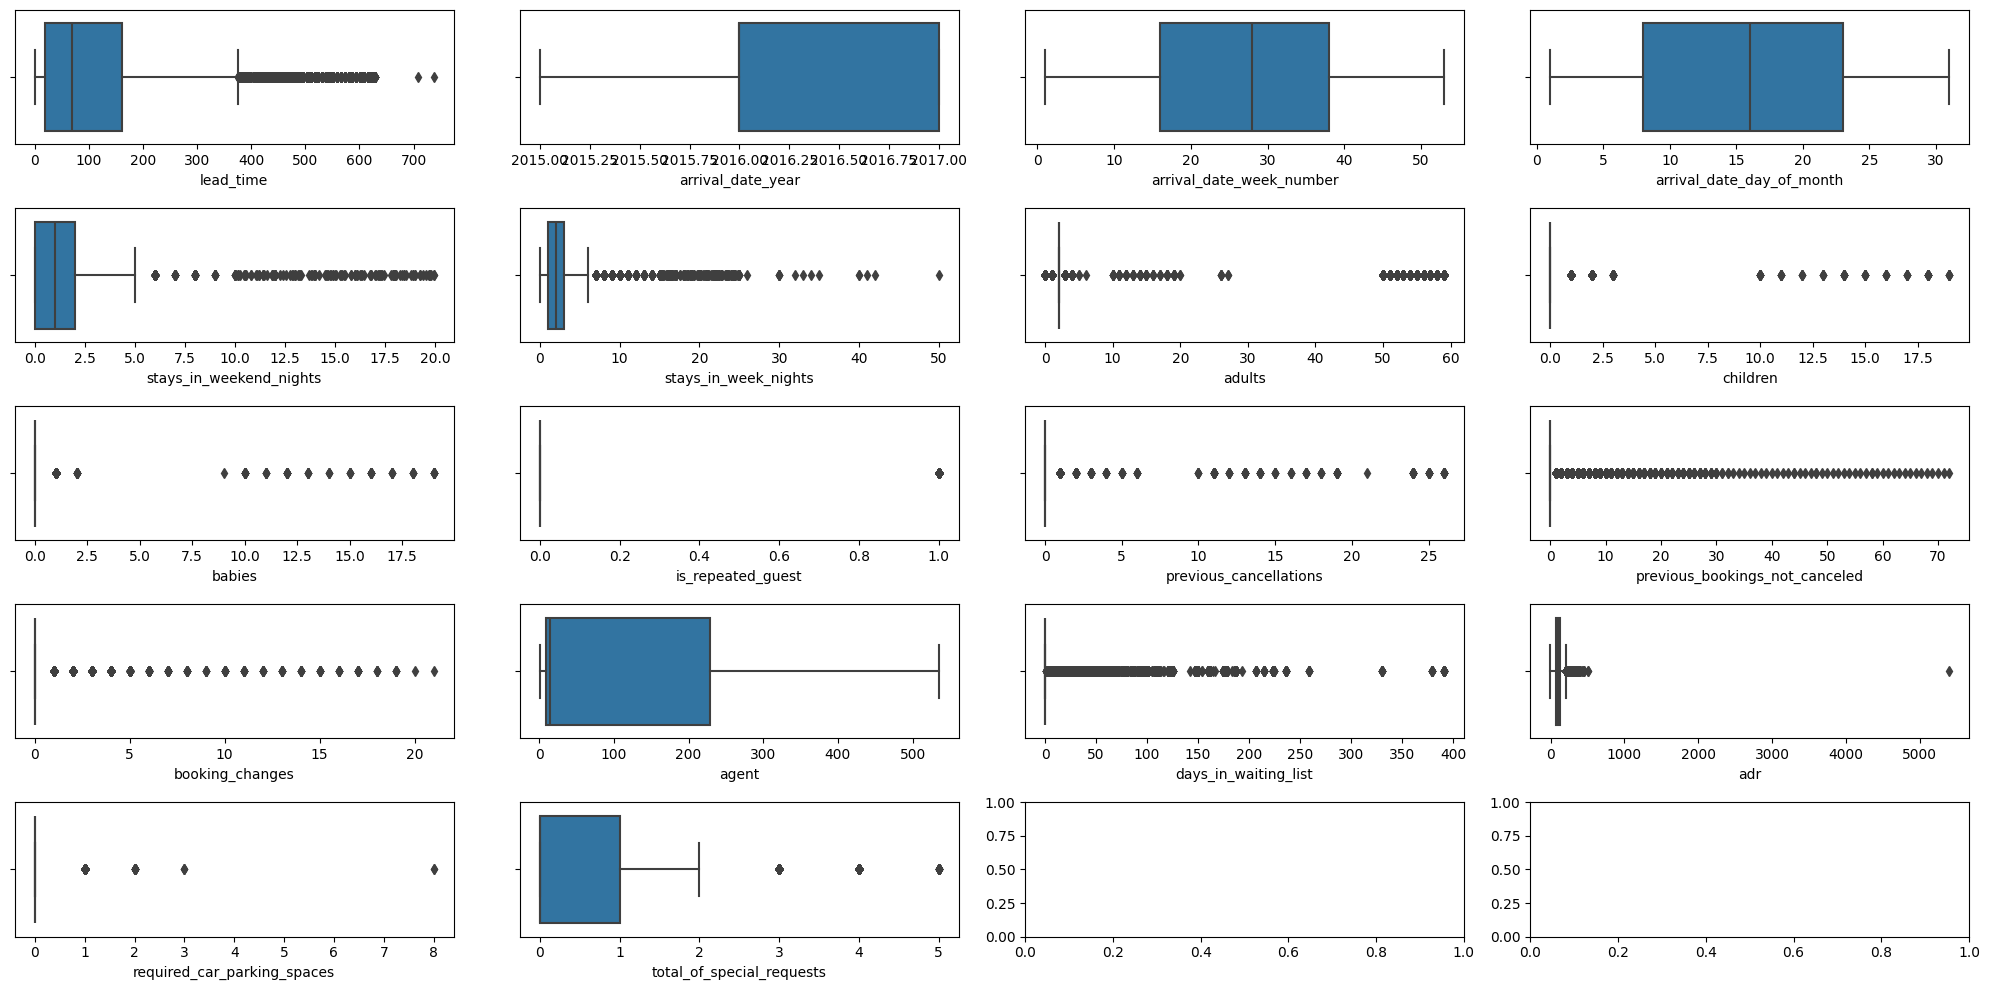

In [17]:
# lo siguiente que tendríamos que hacer es ver si dentro de las columnas donde tenemos nulos tenemos valores atípicos. 
# Para hacer esto lo mejor es usar visualización, sin embargo, todavía no hemos aprendido (lo haremos mañana). 
# Por lo tanto, el código que tenéis a continuación no es necesario que lo entendais. 

fig, axes = plt.subplots(nrows = 5, ncols = 4, figsize = (20,10)) 

axes = axes.flat

for indice, col in enumerate(nulos_esta_num):
    sns.boxplot(x = col, data = df, ax = axes[indice])
    
plt.tight_layout()


Seguimos con la imputación de las columnas numéricas, usaremos la mediana

In [18]:
# Selecciona solo las columnas numéricas
numeric_cols = df.select_dtypes(include='number')

# Selecciona las columnas numéricas que tienen valores nulos
cols_with_nans = numeric_cols.columns[numeric_cols.isnull().any()].tolist()
cols_with_nans

['lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'agent',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

In [19]:
# Calcular la mediana para cada columna específica y rellenar los valores nulos
def imputar_nulos (columnas):
    for col in columnas:
        mediana = df[col].median()
        df[col].fillna(mediana, inplace=True)
        df[col] = df[col].round(1)
    # Comprobar los nulos para cada columna específica
    for col in columnas:
        print(f"Después del 'fillna' la columna {col.upper()} tiene {df[col].isnull().sum()} nulos")

In [20]:
imputar_nulos(cols_with_nans)

Después del 'fillna' la columna LEAD_TIME tiene 0 nulos
Después del 'fillna' la columna ARRIVAL_DATE_YEAR tiene 0 nulos
Después del 'fillna' la columna ARRIVAL_DATE_WEEK_NUMBER tiene 0 nulos
Después del 'fillna' la columna ARRIVAL_DATE_DAY_OF_MONTH tiene 0 nulos
Después del 'fillna' la columna STAYS_IN_WEEKEND_NIGHTS tiene 0 nulos
Después del 'fillna' la columna STAYS_IN_WEEK_NIGHTS tiene 0 nulos
Después del 'fillna' la columna ADULTS tiene 0 nulos
Después del 'fillna' la columna CHILDREN tiene 0 nulos
Después del 'fillna' la columna BABIES tiene 0 nulos
Después del 'fillna' la columna IS_REPEATED_GUEST tiene 0 nulos
Después del 'fillna' la columna PREVIOUS_CANCELLATIONS tiene 0 nulos
Después del 'fillna' la columna PREVIOUS_BOOKINGS_NOT_CANCELED tiene 0 nulos
Después del 'fillna' la columna BOOKING_CHANGES tiene 0 nulos
Después del 'fillna' la columna AGENT tiene 0 nulos
Después del 'fillna' la columna DAYS_IN_WAITING_LIST tiene 0 nulos
Después del 'fillna' la columna ADR tiene 0 nulo

Cambiar float a int

In [21]:
columna = ['adults', 'babies','children']

In [22]:
def convert_to_int_if_no_decimals(df):
    numeric_cols = df.select_dtypes(include='number')
    
    for col in numeric_cols.columns:
        if (numeric_cols[col] % 1 == 0).all():  # Verifica si todos los valores son enteros
            df[col] = df[col].astype('Int64')  # Convierte a entero manteniendo los NaN
        
    return df

In [23]:
convert_to_int_if_no_decimals(df)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,False,342.0,2015,July,27,1,0.0,0.0,2,0,0,BB,PRT,unknown,Direct,0,0,0,C,C,3,14,0,Transient,0.0,0,0,Check-Out,2015-07-01 00:00:00
1,Resort Hotel,False,737.0,2016,July,27,1,0.0,0.0,2,0,0,BB,unknown,unknown,Direct,0,0,0,unknown,C,4,14,0,Transient,0.0,0,0,Check-Out,2015-07-01 00:00:00
2,Resort Hotel,False,7.0,2015,July,27,1,0.0,1.0,1,0,0,BB,GBR,unknown,Direct,0,0,0,A,C,0,14,0,Transient,75.0,0,0,Check-Out,2015-07-02 00:00:00
3,Resort Hotel,False,13.0,2016,July,27,1,0.0,1.0,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,304,0,Transient,75.0,0,0,Check-Out,2015-07-02 00:00:00
4,Resort Hotel,False,14.0,2016,July,28,1,0.0,2.0,2,0,0,BB,unknown,Online TA,TA/TO,0,0,0,A,A,0,240,0,Transient,98.0,0,1,Check-Out,2015-07-03 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182872,unknown,unknown,224.3,2016,unknown,28,16,19.0,19.8,2,0,0,unknown,unknown,unknown,unknown,0,0,0,unknown,unknown,0,14,0,unknown,94.6,0,0,unknown,unknown
182873,unknown,unknown,390.1,2016,unknown,28,16,14.8,20.0,2,0,0,unknown,unknown,unknown,unknown,0,0,0,unknown,unknown,0,14,0,unknown,94.6,0,0,unknown,unknown
182874,unknown,unknown,230.7,2016,unknown,28,16,11.4,20.5,2,0,0,unknown,unknown,unknown,unknown,0,0,0,unknown,unknown,0,14,0,unknown,94.6,0,0,unknown,unknown
182875,unknown,unknown,304.9,2016,unknown,28,16,16.7,15.4,2,0,0,unknown,unknown,unknown,unknown,0,0,0,unknown,unknown,0,14,0,unknown,94.6,0,0,unknown,unknown


In [24]:
def round_float_columns(df, decimals=2):
    # Selecciona solo las columnas de tipo float
    float_cols = df.select_dtypes(include='float')
    
    # Redondea las columnas float al número de decimales especificado
    df[float_cols.columns] = float_cols.round(decimals)
    
    return df

In [25]:
round_float_columns(df)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,False,342.0,2015,July,27,1,0.0,0.0,2,0,0,BB,PRT,unknown,Direct,0,0,0,C,C,3,14,0,Transient,0.0,0,0,Check-Out,2015-07-01 00:00:00
1,Resort Hotel,False,737.0,2016,July,27,1,0.0,0.0,2,0,0,BB,unknown,unknown,Direct,0,0,0,unknown,C,4,14,0,Transient,0.0,0,0,Check-Out,2015-07-01 00:00:00
2,Resort Hotel,False,7.0,2015,July,27,1,0.0,1.0,1,0,0,BB,GBR,unknown,Direct,0,0,0,A,C,0,14,0,Transient,75.0,0,0,Check-Out,2015-07-02 00:00:00
3,Resort Hotel,False,13.0,2016,July,27,1,0.0,1.0,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,304,0,Transient,75.0,0,0,Check-Out,2015-07-02 00:00:00
4,Resort Hotel,False,14.0,2016,July,28,1,0.0,2.0,2,0,0,BB,unknown,Online TA,TA/TO,0,0,0,A,A,0,240,0,Transient,98.0,0,1,Check-Out,2015-07-03 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182872,unknown,unknown,224.3,2016,unknown,28,16,19.0,19.8,2,0,0,unknown,unknown,unknown,unknown,0,0,0,unknown,unknown,0,14,0,unknown,94.6,0,0,unknown,unknown
182873,unknown,unknown,390.1,2016,unknown,28,16,14.8,20.0,2,0,0,unknown,unknown,unknown,unknown,0,0,0,unknown,unknown,0,14,0,unknown,94.6,0,0,unknown,unknown
182874,unknown,unknown,230.7,2016,unknown,28,16,11.4,20.5,2,0,0,unknown,unknown,unknown,unknown,0,0,0,unknown,unknown,0,14,0,unknown,94.6,0,0,unknown,unknown
182875,unknown,unknown,304.9,2016,unknown,28,16,16.7,15.4,2,0,0,unknown,unknown,unknown,unknown,0,0,0,unknown,unknown,0,14,0,unknown,94.6,0,0,unknown,unknown


In [26]:
df['is_canceled'].value_counts()

is_canceled
False      75166
unknown    63487
True       44224
Name: count, dtype: int64

In [27]:
df['is_canceled'] = df['is_canceled'].replace({'True': 'Yes', 'False': 'No'})


In [28]:
df['is_canceled'].value_counts()

is_canceled
False      75166
unknown    63487
True       44224
Name: count, dtype: int64

In [29]:
df.to_csv('finanzas-reservas.csv')